# Predicting heart disease using machine learning
<br>
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## what is classification ?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## 1. Problem Definition 
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation 
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Feature 
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
     * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

<br>

***reminder***

* **`X` = features = features variables = data**
* **`y` = labels = target = target variables**

![.](images/ml_map.png)

*see after how we choose our model !*

# Standards import 
(Preparing the tools)

In [564]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [565]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [566]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Let's see how many positive (1) and negative (0) samples we have in our dataframe**

In [567]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [568]:
df.target.value_counts(normalize=True) # values in percentage

1    0.544554
0    0.455446
Name: target, dtype: float64

Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples

<AxesSubplot:>

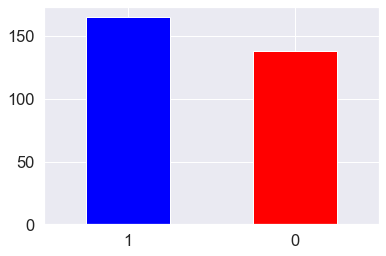

In [569]:
df.target.value_counts().plot.bar(color=("blue", "red"), rot=0)

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.
In our case, there are no missing values and all of our columns are numerical in nature.

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [571]:
# are there any missing values ?
df.isna().sum() # NO

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<br><br>
Another way to get some quick insights on your dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [572]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`.

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column: <br>
1 = heart disease present, <br>
0 = no heart disease.<br>

And for sex, <br>
1 = male, 0 = female.

In [573]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [574]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


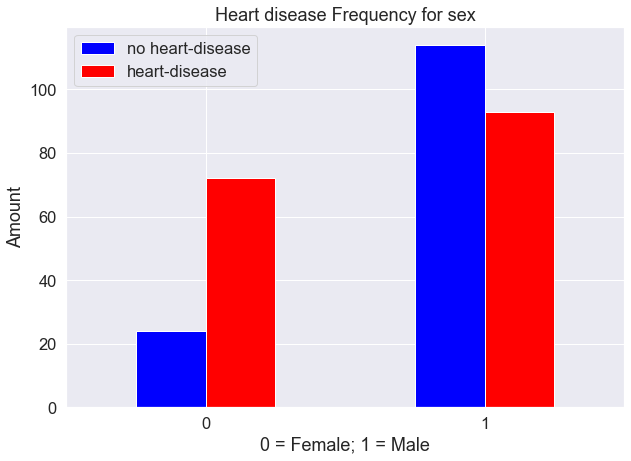

In [575]:
# Create a plot of cross tab
pd.crosstab(df.sex, df.target).plot.bar(figsize=(10,7), color=("blue", "red"), rot=0)
plt.title("Heart disease Frequency for sex")
plt.xlabel("0 = Female; 1 = Male")
plt.ylabel("Amount")
plt.legend(("no heart-disease", "heart-disease"));
# negative correlation

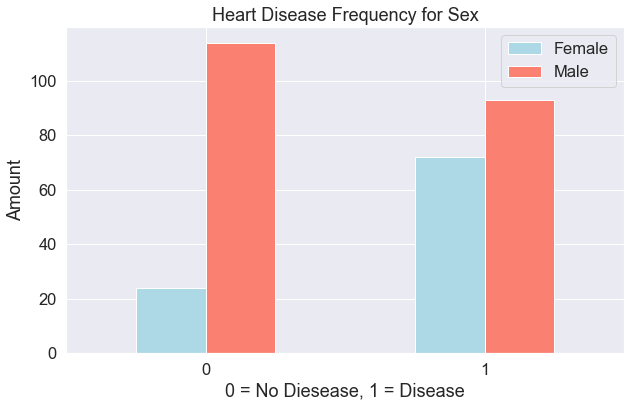

In [576]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    rot=0,
                                    color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

## Age vs Max Heart rate (`thalach`), for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot (not a bar plot).

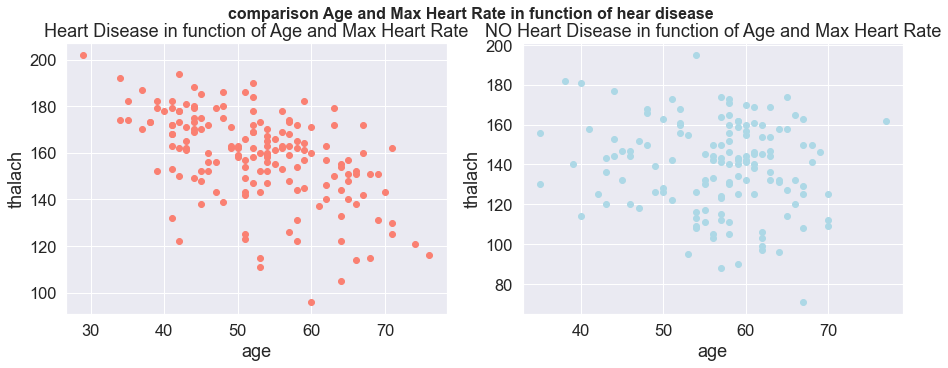

In [577]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,5),
                                            ncols=2,
                                            nrows=1)

fig.suptitle("comparison Age and Max Heart Rate in function of hear disease", fontsize=16, fontweight="bold")

######################################################

ax1.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c="salmon"
           )
ax1.set(title="Heart Disease in function of Age and Max Heart Rate",
        xlabel="age",
        ylabel="thalach"
       )

######################################################

ax2.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c="lightblue"
           )
ax2.set(title="NO Heart Disease in function of Age and Max Heart Rate",
        xlabel="age",
        ylabel="thalach");

# ax2.axis('equal') # don't do we see nothing

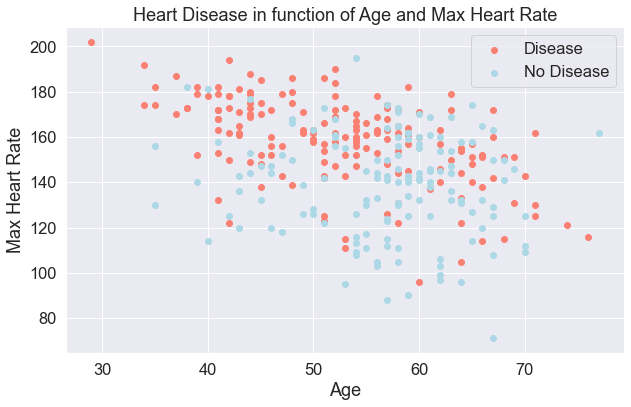

In [578]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age **distribution.**

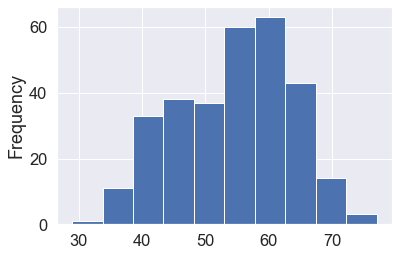

In [579]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist(); 

We can see it's a **normal distribution** but slightly swaying to the right, which reflects in the scatter plot above.
<br>
Let's keep going.

## Heart Disease Frequency per Chest Pain (`cp`) Type

Let's try another independent variable. This time, `cp` (chest pain).
<br>
We'll use the same process as we did before with `sex`.

* cp - chest pain type:
    0. Typical angina: chest pain related decrease blood supply to the heart
    1. Atypical angina: chest pain not related to heart
    2. Non-anginal pain: typically esophageal spasms (non heart related)
    3. Asymptomatic: chest pain not showing signs of disease

In [580]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


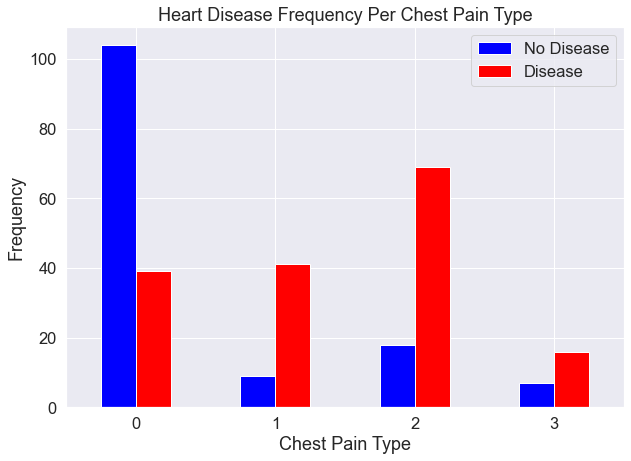

In [581]:
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10,7), color=("blue", "red"), rot=0)

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])

## Correlation between independent variables

We'll compare all of the independent variables in one hit, why ?
<br>
Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

In [582]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


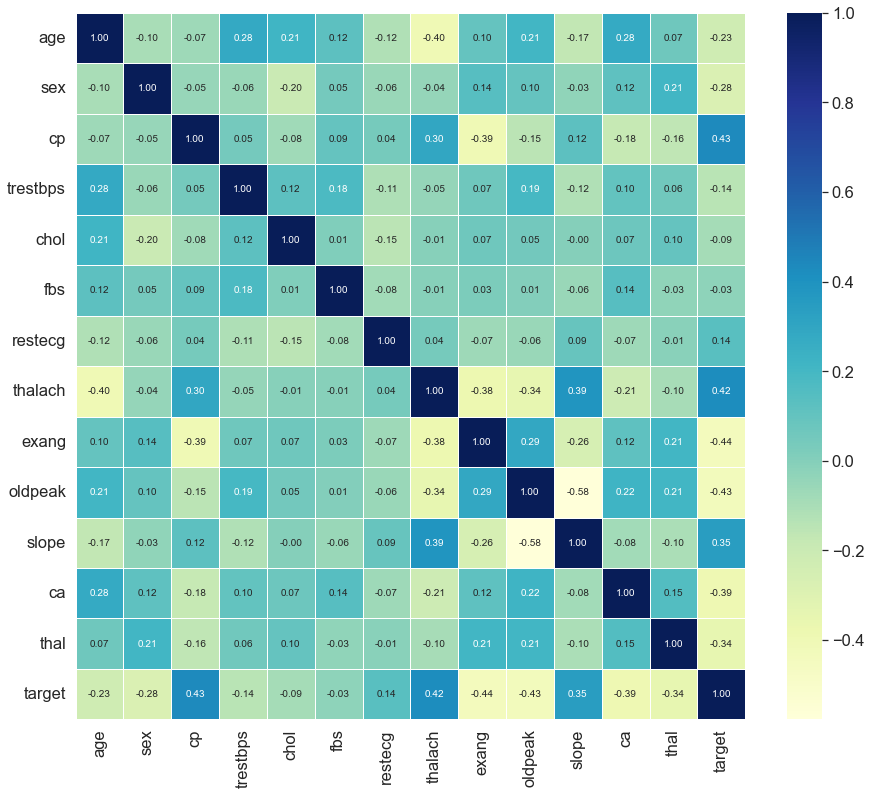

In [583]:
fig, ax = plt.subplots(figsize=(15,13))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

`fmt` : <br>
`.1e` = scientific notation with 1 decimal point (standard form)<br>
`.2f` = 2 decimal places<br>
`.3g` = 3 significant figures<br>
`.4%` = percentage with 4 decimal places<br>
ect ...

<strong>
<font color='red'>
A higher positive value means a potential positive correlation (increase : if one increase, the other one also increase). 
    
A higher negative value means a potential negative correlation (decrease : if one increase, the other one decrease).
</font>
</strong>



**Exemple 1:**

**if the patient is sex=1 (man), he is more likely to have target=0 (no heart-disease) then if the patient was sexe=0 (woman)**

**Exemple 2:**

`cp` and `target` => $correlation=0.43$ ( positive )

According to our correlation matrix, as `cp` go up, `target` also increase.

## 5. Modelling

In [584]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Scale data

In [675]:
scaler = StandardScaler()

X = df.drop("target",axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_scaled = scaler.fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


## Model choices

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`

> google : machine learning models used for lassification problems

![.](images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png)

For `LinearSVC`, let's pretend we've tried it, and it doesn't work, so we're following other options in the map.

For `LogisticRegression`, despite its name, is a linear model for classification rather than regression

In [586]:
# Put models in a dictionary :
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000), # Warning if `max_iter` not change (100 default)
    "KNN" : KNeighborsClassifier(),
    "Random forest" : RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {} 
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores 

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.819672131147541,
 'Random forest': 0.8360655737704918}

In [587]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"]).T
# classifier deafalt score metrix is accuracy
model_compare

,accuracy
Logistic Regression,0.819672
KNN,0.819672
Random forest,0.836066


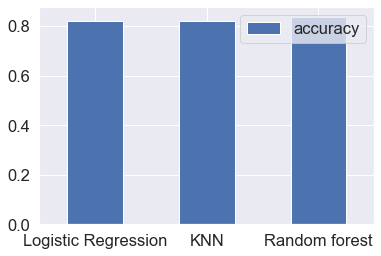

In [588]:
model_compare.plot.bar(rot=0);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following :

* Hypyterparameter tuning
* Feature importance

classification specificity :
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


## Hyperparameter tuning by hand : KNN

In [589]:
test_score = {}
train_score = []

knn = KNeighborsClassifier()
neighbors = range(1,51)

for n in neighbors:
    knn.set_params(n_neighbors=n)
    knn.fit(X_train,y_train)
    test_score[n] = knn.score(X_test,y_test)
    train_score.append(knn.score(X_train,y_train))
    

Max KNN score on test data : 83.61%


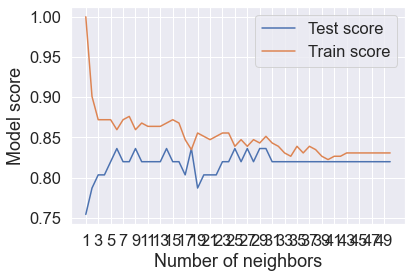

In [590]:
plt.plot(neighbors, test_score.values(), label="Test score")
plt.plot(neighbors, train_score, label="Train score")
plt.xticks(range(1,51,2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Max KNN score on test data : {max(test_score.values())*100:.2f}%")

In [591]:
best_n_neighbors = sorted(test_score.items(), key= lambda x:x[1])[-1][0]
knn_tune = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_tune.fit(X_test, y_test)
print(" neighbors : ", best_n_neighbors, "\n score : ", knn_tune.score(X_test, y_test))

 neighbors :  30 
 score :  0.7868852459016393


## Hyperparameter tuning with RandomizedSearchCV

**`np.logspace`**

(True,
 array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
         27.82559402,  35.93813664,  46.41588834,  59.94842503,
         77.42636827, 100.        ]))

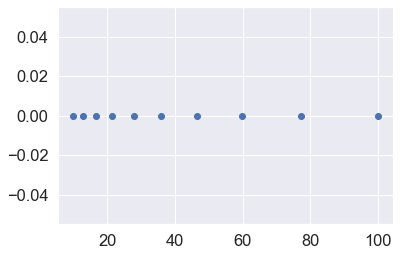

In [592]:
# The numpy logspace() function is used to create an array 
# of equally spaced values between two numbers on the logarithmic scale
# by defaul, base is 10

plt.scatter(np.logspace(1, 2, 10),[0]*10)

base = 10
num = 10 # lenght
logspace = np.logspace(1, 2, num=num, base=base)
exp = np.linspace(1,2,10)
temp = np.full(base,num)
logspace_2 = temp**exp

np.all(logspace == logspace_2), logspace

In [593]:
# Different LogisticRegression hyperparameters
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20), 
    "solver":["liblinear"],
    "max_iter":np.arange(100,1000,100)# better to use numpy than a list
}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),# better to use numpy than a list
           "min_samples_leaf": np.arange(1, 20, 2)}# better to use numpy than a list

# Create a hyperparameter grid for RandomForestClassifier

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [594]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=100,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [595]:
rs_log_reg.best_estimator_

LogisticRegression(C=29.763514416313132, solver='liblinear')

In [596]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 100, 'C': 29.763514416313132}

In [597]:
rs_log_reg.score(X_test,y_test)

0.819672131147541

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestClassifier()`...

In [598]:
model = RandomForestClassifier(n_jobs=-1)

rs_rf = RandomizedSearchCV(model,
                          param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                          )

rs_rf.fit(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [599]:
rs_rf.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=11, min_samples_split=18,
                       n_estimators=260, n_jobs=-1)

In [600]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_depth': 10}

In [601]:
rs_rf.score(X_test,y_test)

0.8852459016393442

**Comparaison**

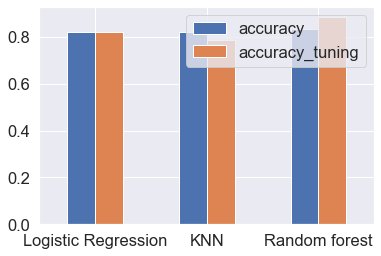

In [602]:
model_score_tuning = pd.Series([
    rs_log_reg.score(X_test, y_test),
    knn_tune.score(X_test, y_test),
    rs_rf.score(X_test, y_test)
], index=["Logistic Regression","KNN","Random forest"])

model_compare["accuracy_tuning"] = model_score_tuning

model_compare.plot.bar(rot=0);

 ## Hyperparameter tuning with `GridSearchCV`

In [603]:
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20), 
    "solver":["liblinear", "lbfgs"],
    "max_iter":np.arange(100,1000,100)
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [604]:
gs_log_reg.best_params_, gs_log_reg.best_estimator_

({'C': 4.281332398719396, 'max_iter': 100, 'solver': 'liblinear'},
 LogisticRegression(C=4.281332398719396, solver='liblinear'))

In [605]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

## Evaluating our tuned ML classifier, beyong accuracy

* ROC curve and AUC score - `plot_roc_curve()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions, using `predict()`.

In [606]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

/Users/dorian/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


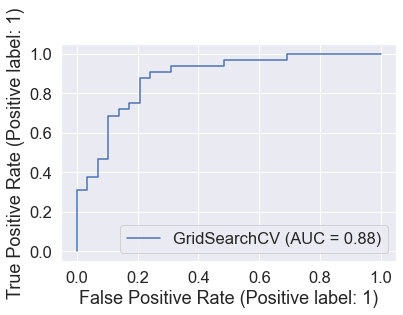

In [607]:
plot_roc_curve(gs_log_reg, X_test, y_test)

**AUC : bottom right**

**FutureWarning**: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)

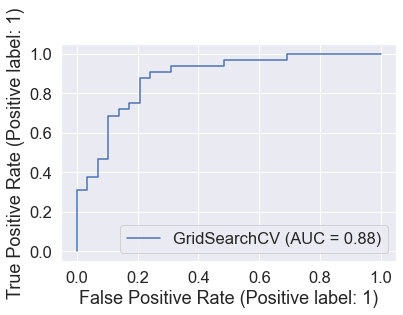

In [608]:
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [609]:
confusion_matrix(y_test, y_preds)

array([[21,  8],
       [ 3, 29]])

In [610]:
pd.crosstab(y_test,y_preds,
           rownames=["True Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
True Labels,,
0,21,8
1,3,29


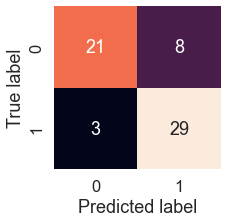

In [611]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_true, y_pred):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`

In [612]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        29
           1       0.78      0.91      0.84        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



## Calculate evaluation metrics using cross-validation

In [613]:
gs_log_reg.best_params_

{'C': 4.281332398719396, 'max_iter': 100, 'solver': 'liblinear'}

In [614]:
clf = LogisticRegression(**gs_log_reg.best_params_)

**Warning use `X_scaled` not `X`**

In [620]:
cv_precision_array = cross_val_score(clf, 
                         X_scaled,
                         y,
                        cv=5,
                        scoring="precision")

cv_precision = np.mean(cv_precision_array)
cv_precision

0.8239892427392427

In [619]:
cv_acc_array = cross_val_score(clf, 
                         X_scaled,
                         y,
                        cv=5,
                        scoring="accuracy")

cv_acc = np.mean(cv_acc_array)
cv_acc

0.831584699453552

In [616]:
cv_recall_array = cross_val_score(clf, 
                         X_scaled,
                         y,
                        cv=5,
                        scoring="recall")

cv_recall = np.mean(cv_recall_array)
cv_recall

0.8848484848484848

In [617]:
cv_f1_array = cross_val_score(clf, 
                         X_scaled,
                         y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1_array)
cv_f1

0.8521267621267622

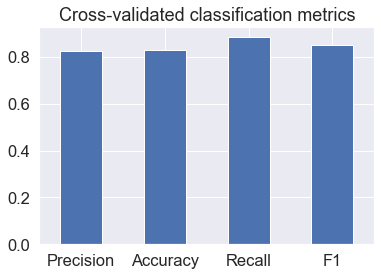

In [633]:
cv_metrics = pd.DataFrame({
    "Precision":cv_precision,
    "Accuracy":cv_acc,
    "Recall":cv_recall,
    "F1":cv_f1
    },
    index=["score"])

cv_metrics.T.plot.bar(rot=0,
                    legend=False,
                    title="Cross-validated classification metrics");

## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

**google: "sklearn logistic regression feature importance"**<br>
https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

In [634]:
clf = LogisticRegression(**gs_log_reg.best_params_).fit(X_train, y_train)

In [635]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [665]:
clf.coef_ # negative or positive corelation

array([[0.1987371 , 0.99548064, 0.97114316, 0.45637973, 0.30320139,
        0.0029383 , 0.21953058, 0.88771713, 0.50030996, 0.64112213,
        0.26005553, 0.59318043, 0.56118065]])

In [644]:
len(clf.coef_[0]), len(df.columns) # dont forget the target column

(13, 14)

In [648]:
feature = dict(zip(df.columns, list(clf.coef_[0])))
feature

{'age': 0.19873710210933287,
 'sex': -0.9954806437295922,
 'cp': 0.9711431572236306,
 'trestbps': -0.45637973427817885,
 'chol': -0.3032013877347289,
 'fbs': -0.002938304847209666,
 'restecg': 0.21953058420923183,
 'thalach': 0.8877171335243832,
 'exang': -0.5003099577470239,
 'oldpeak': -0.6411221251046073,
 'slope': 0.26005552766809475,
 'ca': -0.5931804327224444,
 'thal': -0.5611806516702535}

In [652]:
feature_df = pd.DataFrame(feature, index=["coef"])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
coef,0.198737,-0.995481,0.971143,-0.45638,-0.303201,-0.002938,0.219531,0.887717,-0.50031,-0.641122,0.260056,-0.59318,-0.561181


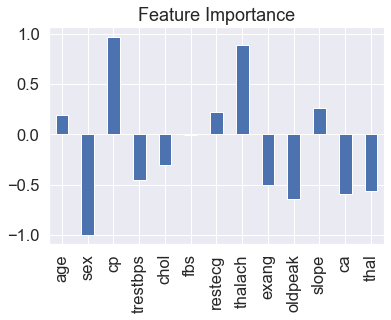

In [666]:
feature_df.T.plot.bar(title="Feature Importance", legend=False);

**The highter the value (in absolute), the more the feature contributes to the models decision.**

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

**For example, the sex attribute has a negative value , which means as the value for sex increases, the target value decreases.
<br>
So if the patient is sex=1 (man), he is more likely to have target=0 (no heart-disease) then if the patient was sexe=0 (woman)**

<AxesSubplot:title={'center':'Feature Importance'}>

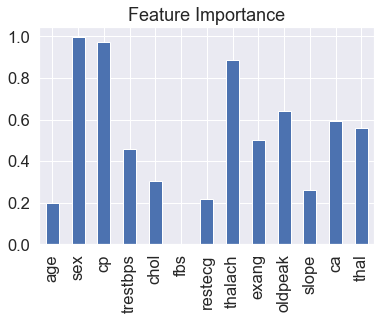

In [669]:
feature_abs = dict(zip(df.columns, list(np.abs(clf.coef_[0]))))
feature_abs_df = pd.DataFrame(feature_abs, index=["coef"])
feature_abs_df.T.plot.bar(title="Feature Importance", legend=False)

**The highter the value , the more the feature contributes to the models decision.**

<strong>
<font color='red'>
When the correlation is close to 0 you can get rid of it. Why ? <br>
Because when you have a lot data your ML model is slower. <br>
Of course, the model is more accurate, but by deleting useless data, the model still accurate AND is faster
</font>
</strong>

## Delete `fbs`

In [959]:
scaler = StandardScaler()

X = df.drop("target",axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_scaled = scaler.fit_transform(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

######################################

scaler_2 = StandardScaler()

X_2 = df.drop(["target","fbs"],axis=1)
y = df.target

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2)
X_scaled_2 = scaler_2.fit_transform(X_2)
X_train_2 = scaler_2.transform(X_train_2)
X_test_2 = scaler_2.transform(X_test_2)


In [960]:
clf_2 = LogisticRegression(**gs_log_reg.best_params_)
clf = LogisticRegression(**gs_log_reg.best_params_)

score_2 = cross_val_score(clf_2, X_scaled_2, y, cv=5, scoring="precision")
score = cross_val_score(clf, X_scaled, y, cv=5, scoring="precision")
    
score = np.mean(score)
score_2 = np.mean(score_2)

score, score_2

(0.8239892427392427, 0.8193243243243243)

<BarContainer object of 2 artists>

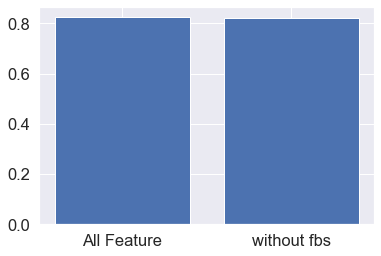

In [961]:
plt.bar(("All Feature","without fbs"),(score, score_2))

In [962]:
clf_2 = LogisticRegression(**gs_log_reg.best_params_).fit(X_test_2, y_test_2)
clf = LogisticRegression(**gs_log_reg.best_params_).fit(X_test, y_test)

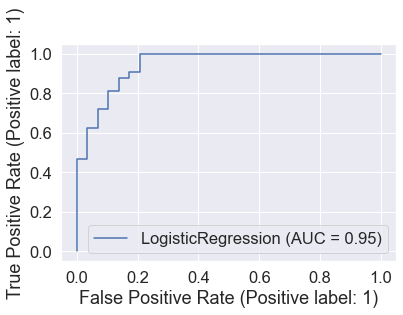

In [963]:
RocCurveDisplay.from_estimator(clf_2, X_test_2, y_test_2)

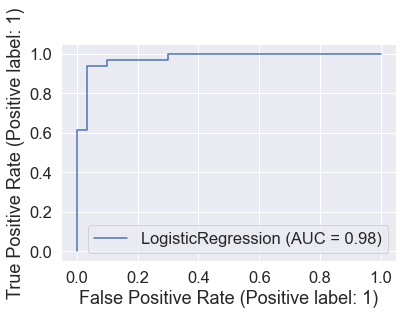

In [964]:
RocCurveDisplay.from_estimator(clf, X_test, y_test)